In [1]:
import time
import copy
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
train_data = pd.read_csv('../data/mnist_train.csv')
test_data = pd.read_csv('../data/mnist_test.csv')

In [3]:
train_X, train_y = torch.Tensor(train_data.iloc[:, 1:].to_numpy()), torch.tensor(train_data.iloc[:, 0].to_numpy())
test_X, test_y = torch.Tensor(test_data.iloc[:, 1:].to_numpy()), torch.tensor(test_data.iloc[:, 0].to_numpy())

In [4]:
train_X.shape, test_y.shape, test_X.shape, test_y.shape

(torch.Size([60000, 784]),
 torch.Size([10000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [5]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.label.value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [7]:
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


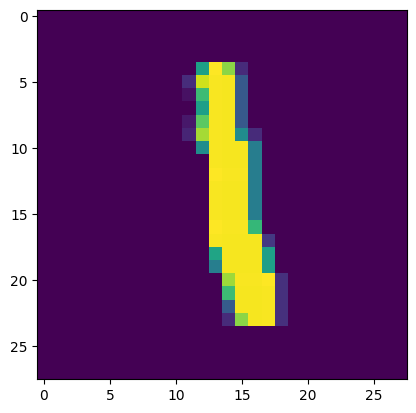

In [8]:
plt.imshow(train_data.loc[6, '1x1':'28x28'].to_numpy().reshape((28, 28)))

### Multi-Class MLP Model

In [ ]:
# model = nn.Sequential(
#     nn.Linear(784, 84),
#     nn.ReLU(),
#     nn.Linear(84, 10)
# )
# opt = optim.SGD(model.parameters(), lr=1e-3)
# loss = nn.CrossEntropyLoss()
# EPOCHS = 10
# BATCH_SIZE = 1024
# model

Sequential(
  (0): Linear(in_features=784, out_features=84, bias=True)
  (1): ReLU()
  (2): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
model = nn.Sequential(
    nn.Linear(784, 84),
    nn.ReLU(),
    nn.Linear(84, 10)
)
opt = optim.SGD(model.parameters(), lr=1e-3)
loss = nn.CrossEntropyLoss()
EPOCHS = 100
BATCH_SIZE = 1024
model

Sequential(
  (0): Linear(in_features=784, out_features=84, bias=True)
  (1): ReLU()
  (2): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
start_time = time.time()
for epoch in tqdm(range(EPOCHS)):
    for i in range((train_X.shape[0]-1)//BATCH_SIZE + 1):
        start_i = i * BATCH_SIZE
        end_i = start_i + BATCH_SIZE
        xb = train_X[start_i:end_i]
        yb = train_y[start_i:end_i]
        pred = model(xb)
        l = loss(pred, yb)
        l.backward()
        opt.step() # Updating weights.
        opt.zero_grad()

print("Time to train linear model with basics:", round(time.time() - start_time),"seconds." ,"epochs:", EPOCHS)

100%|██████████| 100/100 [00:05<00:00, 19.93it/s]

Time to train linear model with basics: 5 seconds. epochs: 100


In [26]:
def accuracy(out, y_batch): 
    return (torch.argmax(out, dim=1)==y_batch).float().mean()

In [27]:
with torch.no_grad():
    print(accuracy(model(train_X), train_y), accuracy(model(test_X), test_y))

tensor(0.9785) tensor(0.9510)


In [ ]:
# start_time = time.time()
# for epoch in tqdm(range(EPOCHS)):
#     print("starting ")
#     for i in tqdm(range((train_X.shape[0]-1)//BATCH_SIZE + 1)):
#         start_i = i * BATCH_SIZE
#         end_i = start_i + BATCH_SIZE
#         xb = train_X[start_i:end_i]
#         yb = train_y[start_i:end_i]
#         pred = model(xb)
#         l = loss(pred, yb)
#         l.backward()
#         opt.step() # Updating weights.
#         opt.zero_grad()

# print("Time to train linear model with basics:", round(time.time() - start_time),"seconds." ,"epochs:", EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]

starting 


 10%|█         | 1/10 [00:00<00:03,  2.97it/s]

starting 


100%|██████████| 59/59 [00:00<00:00, 694.58it/s]


starting 


 30%|███       | 3/10 [00:00<00:01,  6.54it/s]

starting 


100%|██████████| 59/59 [00:00<00:00, 788.17it/s]


starting 


 50%|█████     | 5/10 [00:00<00:00,  8.42it/s]

starting 


100%|██████████| 59/59 [00:00<00:00, 1007.25it/s]


starting 


 70%|███████   | 7/10 [00:00<00:00,  8.97it/s]

starting 


100%|██████████| 59/59 [00:00<00:00, 754.33it/s]


starting 


 90%|█████████ | 9/10 [00:01<00:00, 10.51it/s]

starting 


100%|██████████| 10/10 [00:01<00:00,  9.25it/s]

Time to train linear model with basics: 1 seconds. epochs: 10


In [ ]:
# accuracy(model(train_X), train_y)

tensor(0.9202)

In [ ]:
# accuracy(model(test_X), test_y)

tensor(0.9118)

In [28]:
with torch.no_grad():
    multiclass_pi_train_data = model(train_X).numpy()
    multiclass_pi_test_data = model(test_X).numpy()

multiclass_pi_train_data = pd.DataFrame(np.exp(multiclass_pi_train_data) / np.exp(multiclass_pi_train_data).sum(1)[:, np.newaxis], columns=list(range(10)))
multiclass_pi_test_data = pd.DataFrame(np.exp(multiclass_pi_test_data) / np.exp(multiclass_pi_test_data).sum(1)[:, np.newaxis], columns=list(range(10)))

### Coupling Pairwise MLP Model

In [29]:
pairwise_train_data = {
    (i, j): train_data.query(f"label == {i} or label == {j}")
    for i in range(0, 10)
    for j in range(i+1, 10)
}

pairwise_test_data = {
    (i, j): test_data.query(f"label == {i} or label == {j}")
    for i in range(0, 10)
    for j in range(i+1, 10)
}

In [30]:
pairwise_train_data_tensor = {
    key: {
        'X': torch.Tensor(pairwise_train_data[key].iloc[:, 1:].to_numpy()),
        'y': torch.tensor(pairwise_train_data[key].iloc[:, 0].to_numpy())
    }
    for key in pairwise_train_data
}

pairwise_test_data_tensor = {
    key: {
        'X': torch.Tensor(pairwise_test_data[key].iloc[:, 1:].to_numpy()),
        'y': torch.tensor(pairwise_test_data[key].iloc[:, 0].to_numpy())
    }
    for key in pairwise_test_data
}

In [31]:
for key in pairwise_train_data:
    pairwise_train_data_tensor[key]['y'][pairwise_train_data_tensor[key]['y'] == key[0]] = 0
    pairwise_train_data_tensor[key]['y'][pairwise_train_data_tensor[key]['y'] == key[1]] = 1

for key in pairwise_test_data:
    pairwise_test_data_tensor[key]['y'][pairwise_test_data_tensor[key]['y'] == key[0]] = 0
    pairwise_test_data_tensor[key]['y'][pairwise_test_data_tensor[key]['y'] == key[1]] = 1

In [32]:
EPOCHS = 100
BATCH_SIZE = 1024

In [33]:
pairwise_models = {
    key: nn.Sequential(
        nn.Linear(784, 84),
        nn.ReLU(),
        nn.Linear(84, 2)
    )
    for key in pairwise_train_data
}

pairwise_opt = {
    key: optim.SGD(pairwise_models[key].parameters(), lr=1e-3)
    for key in pairwise_train_data
}

pairwise_loss = {
    key: nn.CrossEntropyLoss()
    for key in pairwise_train_data
}

In [34]:
pairwise_models

{(0,
  1): Sequential(
   (0): Linear(in_features=784, out_features=84, bias=True)
   (1): ReLU()
   (2): Linear(in_features=84, out_features=2, bias=True)
 ),
 (0,
  2): Sequential(
   (0): Linear(in_features=784, out_features=84, bias=True)
   (1): ReLU()
   (2): Linear(in_features=84, out_features=2, bias=True)
 ),
 (0,
  3): Sequential(
   (0): Linear(in_features=784, out_features=84, bias=True)
   (1): ReLU()
   (2): Linear(in_features=84, out_features=2, bias=True)
 ),
 (0,
  4): Sequential(
   (0): Linear(in_features=784, out_features=84, bias=True)
   (1): ReLU()
   (2): Linear(in_features=84, out_features=2, bias=True)
 ),
 (0,
  5): Sequential(
   (0): Linear(in_features=784, out_features=84, bias=True)
   (1): ReLU()
   (2): Linear(in_features=84, out_features=2, bias=True)
 ),
 (0,
  6): Sequential(
   (0): Linear(in_features=784, out_features=84, bias=True)
   (1): ReLU()
   (2): Linear(in_features=84, out_features=2, bias=True)
 ),
 (0,
  7): Sequential(
   (0): Linear(in

In [35]:
for key in pairwise_train_data:
    start_time = time.time()
    for epoch in tqdm(range(EPOCHS)):
        # print("starting ")
        for i in range((train_X.shape[0]-1)//BATCH_SIZE + 1):
            start_i = i * BATCH_SIZE
            end_i = start_i + BATCH_SIZE
            xb = pairwise_train_data_tensor[key]['X'][start_i:end_i]
            yb = pairwise_train_data_tensor[key]['y'][start_i:end_i]
            pred = pairwise_models[key](xb)
            l = pairwise_loss[key](pred, yb)
            l.backward()
            pairwise_opt[key].step() # Updating weights.
            pairwise_opt[key].zero_grad()

    # print(f"Time to train {key} linear model with basics:", round(time.time() - start_time),"seconds." ,"epochs:", EPOCHS)

100%|██████████| 100/100 [00:01<00:00, 55.42it/s]


In [36]:
for key in pairwise_train_data:
    print(f"Train Accuracy {key}:", accuracy(pairwise_models[key](pairwise_train_data_tensor[key]['X']), pairwise_train_data_tensor[key]['y']))

Train Accuracy (0, 1): tensor(1.)
Train Accuracy (0, 2): tensor(0.9990)
Train Accuracy (0, 3): tensor(0.9996)
Train Accuracy (0, 4): tensor(0.9998)
Train Accuracy (0, 5): tensor(0.9988)
Train Accuracy (0, 6): tensor(0.9991)
Train Accuracy (0, 7): tensor(0.9999)
Train Accuracy (0, 8): tensor(0.9990)
Train Accuracy (0, 9): tensor(0.9987)
Train Accuracy (1, 2): tensor(0.9990)
Train Accuracy (1, 3): tensor(0.9993)
Train Accuracy (1, 4): tensor(0.9999)
Train Accuracy (1, 5): tensor(1.)
Train Accuracy (1, 6): tensor(1.)
Train Accuracy (1, 7): tensor(0.9989)
Train Accuracy (1, 8): tensor(0.9982)
Train Accuracy (1, 9): tensor(0.9999)
Train Accuracy (2, 3): tensor(0.9977)
Train Accuracy (2, 4): tensor(0.9997)
Train Accuracy (2, 5): tensor(0.9993)
Train Accuracy (2, 6): tensor(0.9997)
Train Accuracy (2, 7): tensor(0.9972)
Train Accuracy (2, 8): tensor(0.9967)
Train Accuracy (2, 9): tensor(0.9996)
Train Accuracy (3, 4): tensor(0.9999)
Train Accuracy (3, 5): tensor(0.9958)
Train Accuracy (3, 6): t

In [37]:
for key in pairwise_test_data:
    print(f"Test Accuracy {key}:", accuracy(pairwise_models[key](pairwise_test_data_tensor[key]['X']), pairwise_test_data_tensor[key]['y']))

Test Accuracy (0, 1): tensor(0.9991)
Test Accuracy (0, 2): tensor(0.9935)
Test Accuracy (0, 3): tensor(0.9960)
Test Accuracy (0, 4): tensor(0.9975)
Test Accuracy (0, 5): tensor(0.9925)
Test Accuracy (0, 6): tensor(0.9881)
Test Accuracy (0, 7): tensor(0.9955)
Test Accuracy (0, 8): tensor(0.9939)
Test Accuracy (0, 9): tensor(0.9955)
Test Accuracy (1, 2): tensor(0.9972)
Test Accuracy (1, 3): tensor(0.9967)
Test Accuracy (1, 4): tensor(0.9981)
Test Accuracy (1, 5): tensor(0.9951)
Test Accuracy (1, 6): tensor(0.9962)
Test Accuracy (1, 7): tensor(0.9935)
Test Accuracy (1, 8): tensor(0.9948)
Test Accuracy (1, 9): tensor(0.9963)
Test Accuracy (2, 3): tensor(0.9873)
Test Accuracy (2, 4): tensor(0.9876)
Test Accuracy (2, 5): tensor(0.9880)
Test Accuracy (2, 6): tensor(0.9930)
Test Accuracy (2, 7): tensor(0.9806)
Test Accuracy (2, 8): tensor(0.9840)
Test Accuracy (2, 9): tensor(0.9902)
Test Accuracy (3, 4): tensor(0.9965)
Test Accuracy (3, 5): tensor(0.9800)
Test Accuracy (3, 6): tensor(0.9949)
T

In [83]:
pairwise_train_accuracy = dict()
for key in pairwise_train_data:
    pairwise_train_accuracy[key] = accuracy(pairwise_models[key](pairwise_train_data_tensor[key]['X']), pairwise_train_data_tensor[key]['y']).item()

In [84]:
pairwise_test_accuracy = dict()
for key in pairwise_test_data:
   pairwise_test_accuracy[key] = accuracy(pairwise_models[key](pairwise_test_data_tensor[key]['X']), pairwise_test_data_tensor[key]['y'])

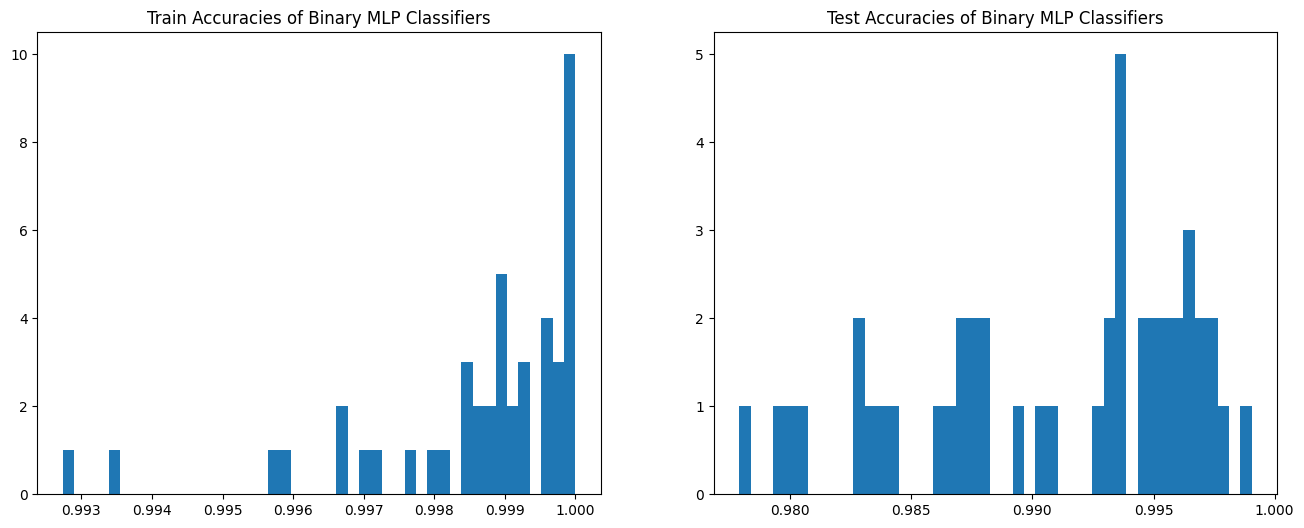

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].hist(pairwise_train_accuracy.values(), bins=45)
ax[0].set_title('Train Accuracies of Binary MLP Classifiers')
ax[1].hist(pairwise_test_accuracy.values(), bins=45)
ax[1].set_title('Test Accuracies of Binary MLP Classifiers')
plt.show()

In [39]:
with torch.no_grad():
    print(pairwise_models[key](pairwise_test_data_tensor[key]['X']))

tensor([[-20.8493, -10.8596],
        [  5.9181,  15.2761],
        [-16.9602,  -3.3916],
        ...,
        [-11.4816,   0.5294],
        [  5.0689, -11.0811],
        [-22.7443,  -2.4882]])


In [40]:
with torch.no_grad():
    rij_train_data = {
        f"{key[0]}_{key[1]}": pairwise_models[key](train_X).numpy()
        for key in pairwise_train_data
    }
    rij_test_data = {
        f"{key[0]}_{key[1]}": pairwise_models[key](test_X).numpy()
        for key in pairwise_test_data
    }

In [41]:
for key in rij_train_data:
    rij_train_data[key] = (np.exp(rij_train_data[key]) / (np.exp(rij_train_data[key]).sum(1)[:, np.newaxis]))[:, 0]
for key in rij_test_data:
    rij_test_data[key] = (np.exp(rij_test_data[key]) / (np.exp(rij_test_data[key]).sum(1)[:, np.newaxis]))[:, 0]

/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_4828/43249622.py:2: RuntimeWarning: overflow encountered in exp
  rij_train_data[key] = (np.exp(rij_train_data[key]) / (np.exp(rij_train_data[key]).sum(1)[:, np.newaxis]))[:, 0]
/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_4828/43249622.py:2: RuntimeWarning: invalid value encountered in divide
  rij_train_data[key] = (np.exp(rij_train_data[key]) / (np.exp(rij_train_data[key]).sum(1)[:, np.newaxis]))[:, 0]
/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_4828/43249622.py:4: RuntimeWarning: overflow encountered in exp
  rij_test_data[key] = (np.exp(rij_test_data[key]) / (np.exp(rij_test_data[key]).sum(1)[:, np.newaxis]))[:, 0]
/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_4828/43249622.py:4: RuntimeWarning: invalid value encountered in divide
  rij_test_data[key] = (np.exp(rij_test_data[key]) / (np.exp(rij_test_data[key]).sum(1)[:, np.newaxis]))[:, 0]


In [42]:
rij_train_data = pd.DataFrame(rij_train_data)
rij_test_data = pd.DataFrame(rij_test_data)

In [43]:
for key in pairwise_train_data:
    rij_train_data[f'{key[1]}_{key[0]}'] = 1 - rij_train_data[f'{key[0]}_{key[1]}']

for key in pairwise_test_data:
    rij_test_data[f'{key[1]}_{key[0]}'] = 1 - rij_test_data[f'{key[0]}_{key[1]}']

In [44]:
pi_train_data = {
    i: 1/45 * np.array([rij_train_data[f'{i}_{j}'].to_numpy() for j in range(10) if j != i]).sum(0)
    for i in range(10)
}
pi_train_data = pd.DataFrame(pi_train_data)

In [45]:
pi_test_data = {
    i: 1/45 * np.array([rij_test_data[f'{i}_{j}'].to_numpy() for j in range(10) if j != i]).sum(0)
    for i in range(10)
}
pi_test_data = pd.DataFrame(pi_test_data)

In [46]:
np.mean(pi_train_data.to_numpy().argmax(1) == train_y.numpy())

0.9911

In [47]:
np.mean(pi_test_data.to_numpy().argmax(1) == test_y.numpy())

0.9651

<BarContainer object of 90 artists>

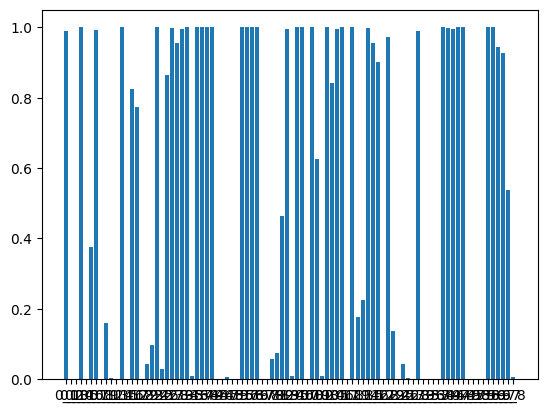

In [49]:
plt.bar(rij_train_data.columns, rij_train_data.iloc[0])

In [48]:
pi_train_data

,0,1,2,3,4,5,6,7,8,9
0,0.078136,0.059069,0.154115,0.175836,0.000154,0.199155,0.044262,0.061484,0.132532,0.095257
1,0.200000,0.022208,0.142153,0.092907,0.000276,0.177061,0.130465,0.087883,0.059280,0.087768
2,0.046140,0.000059,0.130631,0.112307,0.199993,0.088238,0.065351,0.118317,0.082787,0.156178
3,0.003095,0.199953,0.145797,0.110655,0.075841,0.068398,0.035061,0.173030,0.146205,0.041964
4,0.011930,0.067680,0.066266,0.055138,0.177733,0.106605,0.044221,0.155127,0.115419,0.199881
...,...,...,...,...,...,...,...,...,...,...
59995,0.076495,0.095959,0.120381,0.176246,0.086093,0.130829,0.013380,0.031655,0.199999,0.068963
59996,0.088741,0.089958,0.154387,0.199999,0.023341,0.133464,0.000454,0.043246,0.177706,0.088703
59997,0.045595,0.066955,0.022628,0.144121,0.067321,0.200000,0.043589,0.088012,0.167733,0.154046
59998,0.153908,0.064132,0.131010,0.046477,0.100121,0.165338,0.199981,0.046426,0.024542,0.068065


In [50]:
multiclass_pi_train_data

,0,1,2,3,4,5,6,7,8,9
0,2.779379e-09,9.852059e-07,6.128258e-08,9.214031e-04,3.577727e-12,9.988522e-01,9.844246e-09,1.537031e-07,3.795588e-12,2.251631e-04
1,9.999999e-01,1.105993e-14,1.055207e-07,1.272029e-12,1.078645e-16,3.002158e-08,1.937205e-09,9.431465e-12,8.604372e-10,1.022495e-09
2,7.618924e-19,3.872635e-06,3.985355e-03,9.301843e-04,9.863887e-01,2.893237e-09,1.185565e-04,7.659077e-03,8.805230e-04,3.362352e-05
3,3.321226e-15,9.993778e-01,1.573073e-04,1.259114e-11,2.304701e-11,1.018735e-13,7.431854e-13,4.649154e-04,3.460779e-09,5.198890e-12
4,7.256142e-18,3.087324e-09,3.809701e-07,6.757278e-07,2.229840e-03,1.844646e-05,1.674142e-10,4.336143e-05,8.349729e-07,9.977065e-01
...,...,...,...,...,...,...,...,...,...,...
59995,6.470824e-09,1.270999e-06,1.189719e-05,7.542609e-04,3.952784e-08,2.179867e-07,5.281695e-09,6.771781e-07,9.991967e-01,3.493086e-05
59996,1.338470e-09,1.567642e-09,2.239061e-08,9.999607e-01,6.933007e-14,1.464883e-05,2.038553e-11,1.063934e-11,2.464059e-05,4.138919e-08
59997,5.461885e-11,7.751346e-12,1.115991e-13,1.931993e-07,5.075660e-14,9.999995e-01,2.945618e-10,2.829909e-12,6.671250e-11,3.087033e-07
59998,9.290943e-05,3.202414e-04,1.064108e-02,7.693247e-07,3.300401e-05,5.427798e-04,9.881988e-01,8.642905e-06,1.222970e-04,3.938301e-05


In [51]:
nij_train_data = {
    key: dat.shape[0]
    for key, dat in pairwise_train_data.items()
}

nij_test_data = {
    key: dat.shape[0]
    for key, dat in pairwise_test_data.items()
}

In [52]:
track_prob_iter_train_data = list()

In [53]:
pi_iter_train_data = {
    i: np.ones(train_data.shape[0])/10
    for i in range(10)
}

track_prob_iter_train_data.append(pd.DataFrame(np.array(list(copy.deepcopy(pi_iter_train_data).values())).T, columns=np.arange(10)))

N = 100
for _ in tqdm(range(N)):
    pi_iter_train_data = {
        i: pi_iter_train_data[i] * np.array([nij_train_data[(min(i, j), max(i, j))] * rij_train_data[f'{i}_{j}'].to_numpy() for j in range(10) if j != i]).sum(0) / np.array([nij_train_data[(min(i, j), max(i, j))] * pi_iter_train_data[i]/(pi_iter_train_data[i] + pi_iter_train_data[j]) for j in range(10) if j != i]).sum(0)
        for i in range(10)
    }
    normalize_factor = np.array(list(pi_iter_train_data.values())).sum(0)
    for i in pi_iter_train_data:
        pi_iter_train_data[i] /= normalize_factor
    
    track_prob_iter_train_data.append(pd.DataFrame(np.array(list(copy.deepcopy(pi_iter_train_data).values())).T, columns=np.arange(10)))

pi_iter_train_data = pd.DataFrame(np.array(list(pi_iter_train_data.values())).T, columns=np.arange(10))
pi_iter_train_data

100%|██████████| 100/100 [00:01<00:00, 75.83it/s]


,0,1,2,3,4,5,6,7,8,9
0,0.000337,0.000157,0.021444,0.106439,2.390206e-07,0.865619,8.112052e-05,0.000168,0.005085,0.000669
1,0.887545,0.000003,0.008534,0.000998,3.238043e-08,0.096305,4.785814e-03,0.000805,0.000222,0.000802
2,0.001027,0.000001,0.012901,0.007459,9.290227e-01,0.003836,2.007621e-03,0.008965,0.003353,0.031427
3,0.000001,0.893205,0.013725,0.001251,1.175050e-04,0.000081,1.391314e-05,0.077520,0.014065,0.000021
4,0.000021,0.000207,0.000201,0.000144,1.075362e-01,0.000840,9.757337e-05,0.016347,0.001342,0.873265
...,...,...,...,...,...,...,...,...,...,...
59995,0.001034,0.001791,0.003768,0.083162,1.312689e-03,0.005695,8.327230e-05,0.000211,0.902155,0.000788
59996,0.000264,0.000271,0.017726,0.867073,4.977280e-07,0.003961,9.654622e-09,0.000005,0.110455,0.000244
59997,0.000114,0.000228,0.000045,0.014343,2.302617e-04,0.900517,1.015176e-04,0.000510,0.058273,0.025639
59998,0.024570,0.000683,0.008146,0.000372,2.286631e-03,0.046178,9.164329e-01,0.000377,0.000169,0.000785


In [54]:
track_prob_iter_train_data = np.array([track_prob_iter_train_data[i].iloc[2].to_numpy() for i in range(len(track_prob_iter_train_data))])
track_prob_iter_train_data.shape

(101, 10)

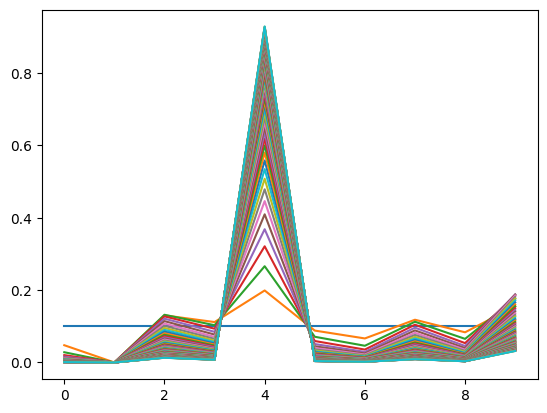

In [125]:
for i in range(100):
    # plt.figure(figsize=(16, 10))
    # plt.title(f'{i}-th iteration of Pairwise Coupling Algorithm on 3rd image of train set')
    plt.plot(track_prob_iter_train_data[i])
    # plt.savefig(f'../assets/{i}.png')

In [56]:
np.mean(pi_iter_train_data.to_numpy().argmax(1) == train_y.numpy())

0.9907166666666667

In [57]:
pi_iter_test_data = {
    i: np.ones(test_data.shape[0])/10
    for i in range(10)
}

N = 100
for _ in tqdm(range(N)):
    pi_iter_test_data = {
        # nij_test_data won't be available to us while predicting
        i: pi_iter_test_data[i] * np.array([nij_train_data[(min(i, j), max(i, j))] * rij_test_data[f'{i}_{j}'].to_numpy() for j in range(10) if j != i]).sum(0) / np.array([nij_train_data[(min(i, j), max(i, j))] * pi_iter_test_data[i]/(pi_iter_test_data[i] + pi_iter_test_data[j]) for j in range(10) if j != i]).sum(0)
        for i in range(10)
    }
    normalize_factor = np.array(list(pi_iter_test_data.values())).sum(0)
    for i in pi_iter_test_data:
        pi_iter_test_data[i] /= normalize_factor

pi_iter_test_data = pd.DataFrame(np.array(list(pi_iter_test_data.values())).T, columns=np.arange(10))
pi_iter_test_data

100%|██████████| 100/100 [00:00<00:00, 367.81it/s]


,0,1,2,3,4,5,6,7,8,9
0,1.596381e-03,7.815028e-04,0.009857,0.025530,1.302418e-04,0.004526,5.343251e-09,9.271309e-01,0.002312,2.813627e-02
1,1.642615e-04,1.877487e-02,0.910639,0.008149,1.011542e-05,0.019251,4.180197e-02,1.721417e-13,0.001211,3.693909e-07
2,1.041520e-06,9.241439e-01,0.016462,0.004066,3.189626e-04,0.001230,2.614572e-04,3.567398e-02,0.017703,1.400776e-04
3,9.059557e-01,4.150520e-08,0.004742,0.000915,6.853444e-05,0.004528,7.727004e-02,1.576060e-03,0.001056,3.888736e-03
4,4.355287e-04,8.246449e-14,0.003646,0.000047,9.031655e-01,0.000585,2.664639e-03,1.116276e-02,0.000900,7.739344e-02
...,...,...,...,...,...,...,...,...,...,...
9995,7.162991e-04,1.218487e-02,0.925563,0.028469,1.707452e-05,0.001053,5.802401e-04,3.652435e-03,0.027370,3.936951e-04
9996,5.385025e-03,5.236496e-04,0.035610,0.924778,1.260252e-09,0.014439,4.946834e-06,1.684581e-03,0.011644,5.929959e-03
9997,3.137964e-09,5.680745e-07,0.000062,0.000603,8.692850e-01,0.000073,5.372028e-05,4.007124e-03,0.020957,1.049579e-01
9998,3.218266e-03,4.039048e-03,0.001635,0.001825,1.506028e-03,0.899885,1.225862e-03,3.424156e-04,0.085910,4.131372e-04


In [58]:
np.mean(pi_iter_test_data.to_numpy().argmax(1) == test_y.numpy())

0.9649

In [59]:
friedman_pi_train_data = np.array([np.array([rij_train_data[f'{i}_{j}'] > rij_train_data[f'{j}_{i}'] for j in range(10) if j != i]).sum(0) for i in range(10)]).T
friedman_pi_test_data = np.array([np.array([rij_test_data[f'{i}_{j}'] > rij_test_data[f'{j}_{i}'] for j in range(10) if j != i]).sum(0) for i in range(10)]).T
friedman_pi_train_data = pd.DataFrame(friedman_pi_train_data / friedman_pi_train_data.sum(1, keepdims=1), columns=range(10))
friedman_pi_test_data = pd.DataFrame(friedman_pi_test_data / friedman_pi_test_data.sum(1, keepdims=1), columns=range(10))

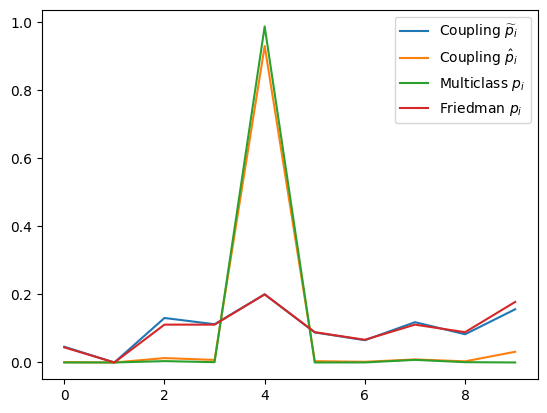

In [60]:
plt.plot(pi_train_data.iloc[2], label = "Coupling $\widetilde{p}_i$")
plt.plot(pi_iter_train_data.iloc[2], label = "Coupling $\hat{p}_i$")
plt.plot(multiclass_pi_train_data.iloc[2], label = "Multiclass $p_i$")
plt.plot(friedman_pi_train_data.iloc[2], label = "Friedman $p_i$")
plt.legend()

In [61]:
np.mean(friedman_pi_train_data.to_numpy().argmax(1) == train_y.numpy())

0.9907833333333333

In [62]:
np.mean(friedman_pi_test_data.to_numpy().argmax(1) == test_y.numpy())

0.9601

In [63]:
prob_model_train_data = torch.nan_to_num(torch.Tensor(rij_train_data[[f"{i}_{j}" for i, j in pairwise_train_data.keys()]].to_numpy()))
prob_model_test_data = torch.nan_to_num(torch.Tensor(rij_test_data[[f"{i}_{j}" for i, j in pairwise_test_data.keys()]].to_numpy()))
prob_model_train_data.shape, prob_model_test_data.shape

(torch.Size([60000, 45]), torch.Size([10000, 45]))

In [64]:
prob_model = nn.Sequential(
    nn.Linear(45, 10)
    )
opt = optim.Adam(prob_model.parameters(), lr=1e-4)
loss = nn.CrossEntropyLoss()
EPOCHS = 1000
BATCH_SIZE = 1024
prob_model

Sequential(
  (0): Linear(in_features=45, out_features=10, bias=True)
)

In [65]:
start_time = time.time()
for epoch in range(EPOCHS):
    for i in range((prob_model_train_data.shape[0]-1)//BATCH_SIZE + 1):
        start_i = i * BATCH_SIZE
        end_i = start_i + BATCH_SIZE
        xb = prob_model_train_data[start_i:end_i]
        yb = train_y[start_i:end_i]
        pred = prob_model(xb)
        l = loss(pred, yb)
        l.backward()
        opt.step() # Updating weights.
        opt.zero_grad()

    with torch.no_grad():
        print(f"EPOCH {epoch}: Train Accuracy: ", accuracy(prob_model(prob_model_train_data), train_y).item())
        print(f"EPOCH {epoch}: Test Accuracy: ", accuracy(prob_model(prob_model_test_data), test_y).item())

print("Time to train linear model with basics:", round(time.time() - start_time),"seconds." ,"epochs:", EPOCHS)

EPOCH 0: Train Accuracy:  0.1464499980211258
EPOCH 0: Test Accuracy:  0.13989999890327454
EPOCH 1: Train Accuracy:  0.188033327460289
EPOCH 1: Test Accuracy:  0.18240000307559967
EPOCH 2: Train Accuracy:  0.23543334007263184
EPOCH 2: Test Accuracy:  0.23010000586509705
EPOCH 3: Train Accuracy:  0.27791666984558105
EPOCH 3: Test Accuracy:  0.2782000005245209
EPOCH 4: Train Accuracy:  0.32296666502952576
EPOCH 4: Test Accuracy:  0.32199999690055847
EPOCH 5: Train Accuracy:  0.3734999895095825
EPOCH 5: Test Accuracy:  0.3698999881744385
EPOCH 6: Train Accuracy:  0.4264666736125946
EPOCH 6: Test Accuracy:  0.42309999465942383
EPOCH 7: Train Accuracy:  0.4676666557788849
EPOCH 7: Test Accuracy:  0.4603999853134155
EPOCH 8: Train Accuracy:  0.5024499893188477
EPOCH 8: Test Accuracy:  0.4959999918937683
EPOCH 9: Train Accuracy:  0.5303833484649658
EPOCH 9: Test Accuracy:  0.5253999829292297
EPOCH 10: Train Accuracy:  0.5577333569526672
EPOCH 10: Test Accuracy:  0.5525000095367432
EPOCH 11: Tr

In [66]:
with torch.no_grad():
    print("Train Accuracy: ", accuracy(prob_model(prob_model_train_data), train_y))
    print("Test Accuracy: ", accuracy(prob_model(prob_model_test_data), test_y))

Train Accuracy:  tensor(0.9894)
Test Accuracy:  tensor(0.9648)


In [67]:
with torch.no_grad():
    pi_prob_train_data = pd.DataFrame(np.exp(prob_model(prob_model_train_data).numpy()) / np.exp(prob_model(prob_model_train_data).numpy()).sum(1, keepdims=True), columns=list(range(10)))
    pi_prob_test_data = pd.DataFrame(np.exp(prob_model(prob_model_test_data).numpy()) / np.exp(prob_model(prob_model_test_data).numpy()).sum(1, keepdims=True), columns=list(range(10)))

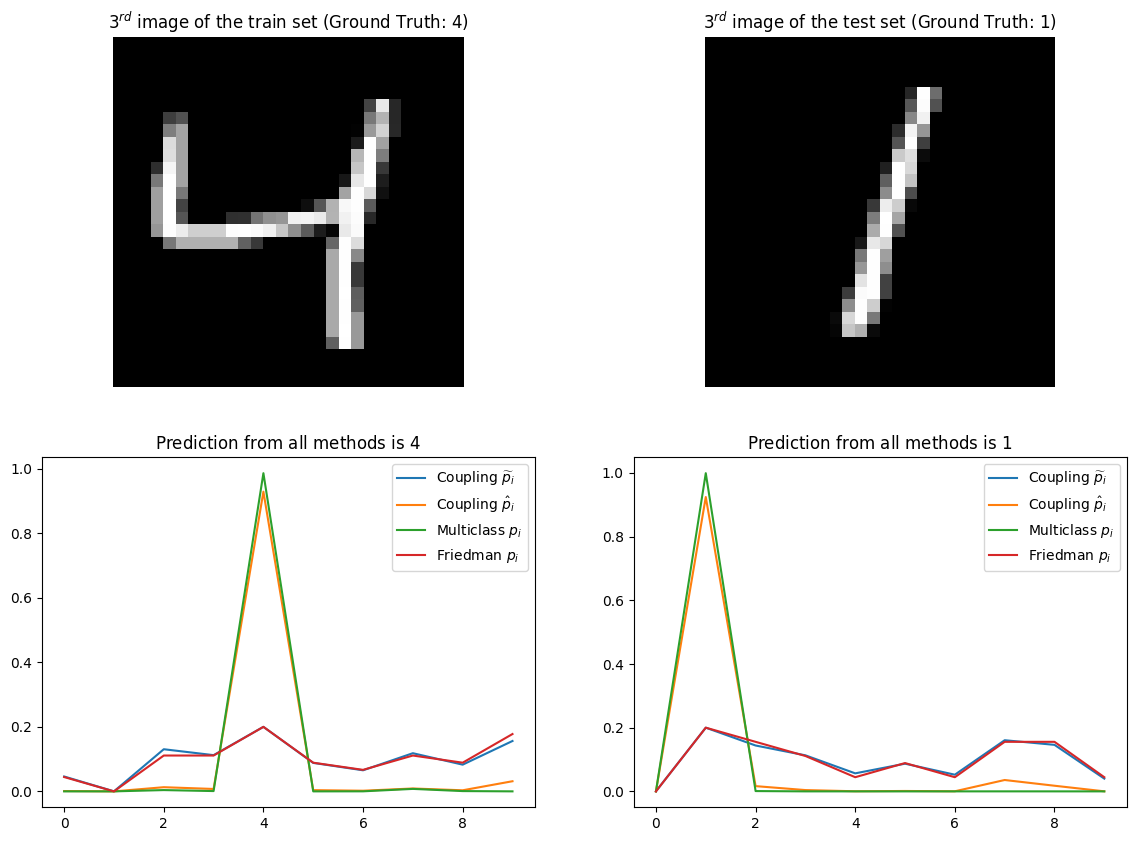

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ax[0,0].imshow(train_data.iloc[2].to_numpy()[1:].reshape((28, 28)), cmap='gray')
ax[0,0].set_title('$3^{rd}$ image of the train set (Ground Truth: $4$)')
ax[0,0].axis('off')

ax[0,1].imshow(test_data.iloc[2].to_numpy()[1:].reshape((28, 28)), cmap='gray')
ax[0,1].set_title('$3^{rd}$ image of the test set (Ground Truth: $1$)')
ax[0,1].axis('off')

ax[1,0].plot(pi_train_data.iloc[2], label = "Coupling $\widetilde{p}_i$")
ax[1,0].plot(pi_iter_train_data.iloc[2], label = "Coupling $\hat{p}_i$")
ax[1,0].plot(multiclass_pi_train_data.iloc[2], label = "Multiclass $p_i$")
ax[1,0].plot(friedman_pi_train_data.iloc[2], label = "Friedman $p_i$")
ax[1,0].set_title('Prediction from all methods is $4$')
ax[1,0].legend()

ax[1,1].plot(pi_test_data.iloc[2], label = "Coupling $\widetilde{p}_i$")
ax[1,1].plot(pi_iter_test_data.iloc[2], label = "Coupling $\hat{p}_i$")
ax[1,1].plot(multiclass_pi_test_data.iloc[2], label = "Multiclass $p_i$")
ax[1,1].plot(friedman_pi_test_data.iloc[2], label = "Friedman $p_i$")
ax[1,1].set_title('Prediction from all methods is $1$')
ax[1,1].legend()

# plt.plot(pi_prob_train_data.iloc[2], label = "Model-Based Coupling $p_i$")

plt.show()

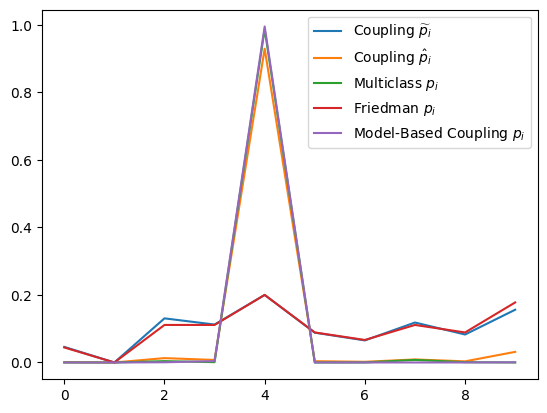

In [ ]:
plt.plot(pi_train_data.iloc[2], label = "Coupling $\widetilde{p}_i$")
plt.plot(pi_iter_train_data.iloc[2], label = "Coupling $\hat{p}_i$")
plt.plot(multiclass_pi_train_data.iloc[2], label = "Multiclass $p_i$")
plt.plot(friedman_pi_train_data.iloc[2], label = "Friedman $p_i$")
plt.plot(pi_prob_train_data.iloc[2], label = "Model-Based Coupling $p_i$")
plt.legend()

In [69]:
cross_entropy_loss = nn.CrossEntropyLoss()
print("Coupling crude pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(pi_train_data.to_numpy())), train_y).item())
print("Coupling iter pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(pi_iter_train_data.to_numpy())), train_y).item())
print("Multiclass pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(multiclass_pi_train_data.to_numpy())), train_y).item())
print("Friedman pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(friedman_pi_train_data.to_numpy())), train_y).item())
print("Model-Based Coupling pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(pi_prob_train_data.to_numpy())), train_y).item())

Coupling crude pi: 2.2052388191223145
Coupling iter pi: 1.5655320882797241
Multiclass pi: 1.4978046417236328
Friedman pi: 2.2046966552734375
Model-Based Coupling pi: 1.4837273359298706


In [ ]:
cross_entropy_loss = nn.CrossEntropyLoss()
print("Coupling crude pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(pi_test_data.to_numpy())), test_y).item())
print("Coupling iter pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(pi_iter_test_data.to_numpy())), test_y).item())
print("Multiclass pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(multiclass_pi_test_data.to_numpy())), test_y).item())
print("Friedman pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(friedman_pi_test_data.to_numpy())), test_y).item())
print("Model-Based Coupling pi:", cross_entropy_loss(torch.nan_to_num(torch.Tensor(pi_prob_test_data.to_numpy())), test_y).item())

Coupling crude pi: 2.2065813541412354
Coupling iter pi: 1.5897736549377441
Multiclass pi: 1.519262671470642
Friedman pi: 2.2062366008758545
Model-Based Coupling pi: 1.5074924230575562


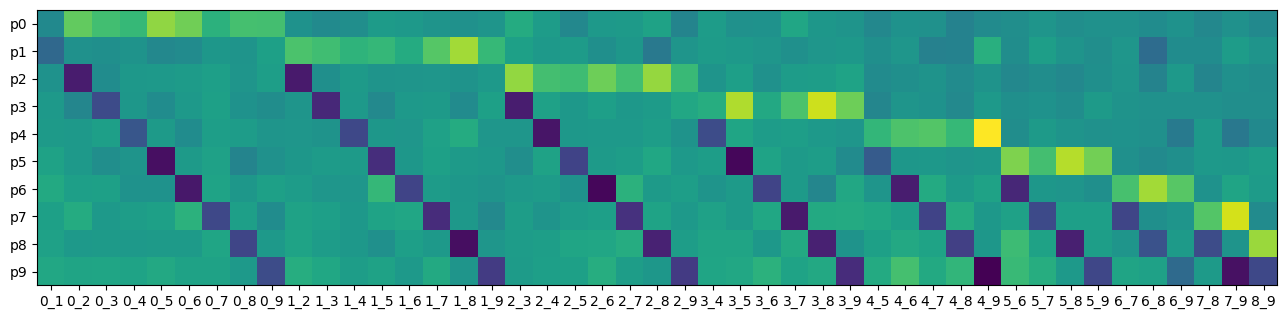

In [71]:
with torch.no_grad():
    plt.figure(figsize=(16, 8))
    plt.imshow(list(prob_model.parameters())[0].numpy())
    plt.xticks(list(range(rij_train_data.shape[-1]//2)), [f'{i}_{j}' for i, j in list(pairwise_train_data.keys())])
    plt.yticks(list(range(10)), [f'p{i}' for i in range(10)])

In [72]:
list(prob_model.parameters())[0].detach().numpy()#.sort(1)

array([[-6.40888035e-01,  1.96604371e+00,  1.42423332e+00,
         1.17231667e+00,  2.63989902e+00,  2.19270372e+00,
         9.14150655e-01,  1.47920644e+00,  1.43063653e+00,
        -2.88896561e-01, -6.02827966e-01, -4.48947936e-01,
         6.56522214e-02, -2.62520146e-02, -2.21689612e-01,
        -3.25696528e-01, -1.84679374e-01,  6.45879865e-01,
         7.18249455e-02, -6.91526771e-01, -7.31522441e-02,
         5.94142219e-03,  2.84990162e-01, -8.24417710e-01,
         1.00876011e-01, -3.58527988e-01, -3.07010561e-01,
         4.50095475e-01, -1.44128844e-01, -2.30384305e-01,
        -7.03385472e-01, -3.11977893e-01, -3.52069765e-01,
        -9.18229043e-01, -5.71000099e-01, -4.49914783e-01,
        -2.05571905e-01, -4.59143609e-01, -3.30694199e-01,
        -3.53823453e-01, -5.04808068e-01, -3.23610365e-01,
        -6.81532800e-01, -3.47313613e-01, -6.44380867e-01],
       [-1.88848341e+00, -3.58442634e-01, -4.22170401e-01,
        -2.80409843e-01, -6.85640574e-01, -5.43617547e-

In [73]:
np.argsort(list(prob_model.parameters())[0].detach().numpy(), axis=1)

array([[33, 23, 30, 19, 42, 44,  0, 10, 34, 40, 37, 35, 11, 25, 39, 32,
        43, 38, 15, 41, 31, 26,  9, 29, 14, 36, 16, 28, 20, 13, 21, 12,
        18, 24, 22, 27, 17,  6,  3,  2,  8,  7,  1,  5,  4],
       [ 0, 40, 22, 32, 33,  4,  5, 42, 41, 35, 38,  2, 20, 30, 27,  1,
         3,  7, 44, 37, 23, 28, 39, 26, 31,  6, 21, 29, 25, 18, 24, 19,
        43, 36,  8, 17, 13, 34, 11, 12, 16, 10,  9, 14, 15],
       [ 9,  1, 40, 42, 37, 35, 33, 30,  2, 44, 36, 31, 38, 10, 43, 26,
         0, 32, 34, 15, 24, 12,  7, 39, 13, 14,  3, 41, 16,  4, 11,  5,
        27, 28,  8, 25,  6, 29, 23, 19, 21, 18, 20, 17, 22],
       [17, 10,  2,  1, 30, 33, 12, 15,  4, 37,  8, 43, 44, 35, 40, 42,
        41, 32, 36,  7, 39,  9, 31,  3, 19, 21, 13, 11,  5,  0, 34, 14,
        38, 22, 20,  6, 16, 18, 23, 26, 24, 27, 29, 25, 28],
       [18, 11, 24,  3, 43, 41, 44,  5, 35, 40, 38, 39, 23, 10, 37,  8,
        29, 17, 16, 13,  9, 12, 19, 42, 21,  1, 20, 28,  4, 36,  0,  7,
        26, 22,  6, 27,  2, 14, 25, 

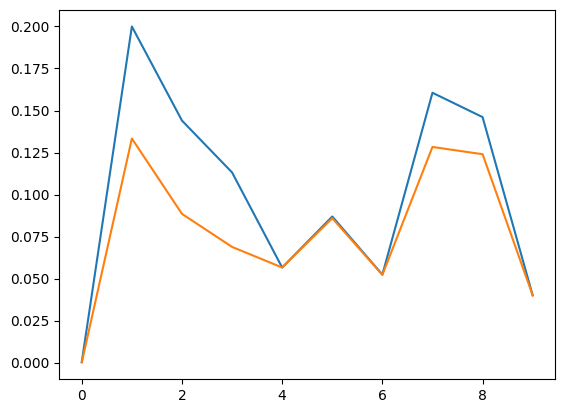

['0_1', '2_7', '8_2', '7_3', '5_1', '6_3', '2_8', '0_2', '7_2', '2_0', '1_6', '6_1', '5_2', '1_0', '1_5', '3_9', '2_5', '3_7', '3_6', '9_3']
1 1 1


In [74]:
idx = 2
NUM_MISSING = 10

rij_obsv = copy.deepcopy(rij_test_data.iloc[idx])
pi = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
plt.plot(pi)

missing_idx = [np.random.choice(10, 2, replace=False) for _ in range(NUM_MISSING)]
missing_idx = list(set([f'{i}_{j}' for i, j in missing_idx] + [f'{j}_{i}' for i, j in missing_idx]))
rij_obsv[missing_idx] = 0
pi_missing = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
plt.plot(pi_missing)
plt.show()
print((missing_idx))
print(pi.argmax(), pi_missing.argmax(), test_y[idx].item())

In [75]:
copy.deepcopy(rij_test_data.iloc[idx])

0_1    9.126976e-31
0_2    1.245587e-02
0_3    5.613331e-04
0_4    1.509848e-03
0_5    2.056837e-05
           ...     
8_6    6.641077e-01
9_6    1.627034e-02
8_7    4.271054e-02
9_7    1.782179e-05
9_8    8.940697e-07
Name: 2, Length: 90, dtype: float32

In [76]:
np.minimum(np.maximum(rij_obsv, 0), 1)

0_1    0.000000e+00
0_2    0.000000e+00
0_3    5.613331e-04
0_4    1.509848e-03
0_5    2.056837e-05
           ...     
8_6    6.641077e-01
9_6    1.627034e-02
8_7    4.271054e-02
9_7    1.782179e-05
9_8    8.940697e-07
Name: 2, Length: 90, dtype: float32

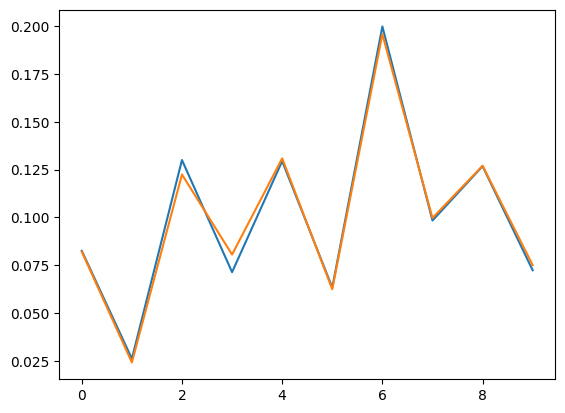

6 6 6


In [ ]:
idx = 100
JITTER_STRENGTH = 0.1

rij_obsv = copy.deepcopy(rij_test_data.iloc[idx])
pi = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
plt.plot(pi)

jitter = np.random.normal(0, JITTER_STRENGTH, rij_obsv.shape[0]//2)
rij_obsv[[f'{i}_{j}' for i, j in pairwise_train_data]] += jitter
rij_obsv[[f'{j}_{i}' for i, j in pairwise_train_data]] -= jitter
rij_obsv = np.minimum(np.maximum(rij_obsv, 0), 1)
pi_jitter = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
plt.plot(pi_jitter)
plt.show()
print(pi.argmax(), pi_jitter.argmax(), test_y[idx].item())

In [156]:
jitter_test_accuracy_point = dict()

In [159]:
JITTER_STRENGTH = 0.2
N = 50
jitter_test_accuracy = list()

for _ in tqdm(range(N)):

    pi_jitter_test_data = list()

    for idx in range(rij_test_data.shape[0]):    
        rij_obsv = copy.deepcopy(rij_test_data.iloc[idx])
        # pi = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
        # plt.plot(pi)
        jitter = np.random.normal(0, JITTER_STRENGTH, rij_obsv.shape[0]//2)
        rij_obsv[[f'{i}_{j}' for i, j in pairwise_train_data]] += jitter
        rij_obsv[[f'{j}_{i}' for i, j in pairwise_train_data]] -= jitter
        rij_obsv = np.minimum(np.maximum(rij_obsv, 0), 1)
        pi_jitter = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
        pi_jitter_test_data.append(pi_jitter)
        # plt.plot(pi_jitter)
        # plt.show()
        # print(pi.argmax(), pi_jitter.argmax(), test_y[idx].item())

    pi_jitter_test_data = pd.DataFrame(np.array(pi_jitter_test_data), columns=list(range(10)))

    jitter_test_accuracy.append(np.mean(pi_jitter_test_data.to_numpy().argmax(1) == test_y.numpy()))

100%|██████████| 50/50 [06:53<00:00,  8.26s/it]


In [ ]:
jitter_test_accuracy_point[JITTER_STRENGTH] = copy.deepcopy(jitter_test_accuracy)

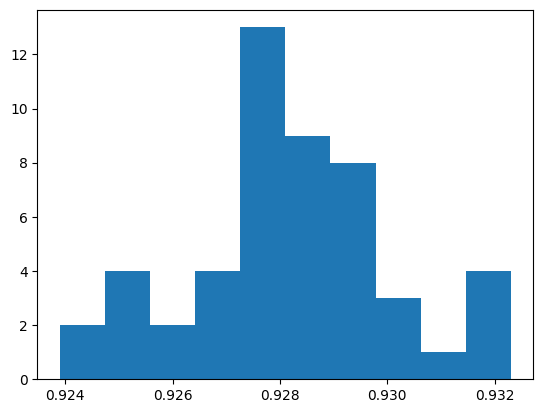

In [161]:
plt.hist(jitter_test_accuracy, bins=10)
plt.show()

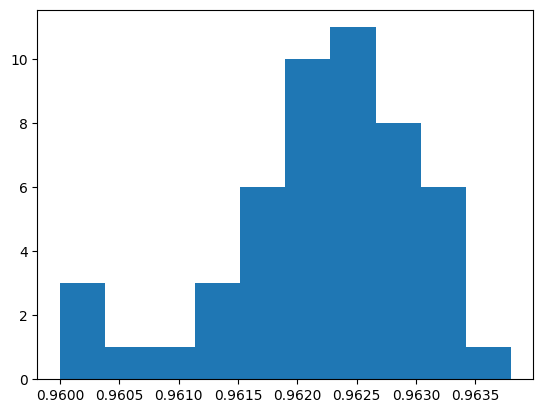

In [ ]:
plt.hist(jitter_test_accuracy, bins=10)
plt.show()

In [131]:
np.mean(pi_test_data.to_numpy().argmax(1) == test_y.numpy())

0.9651

In [ ]:
np.mean(pi_jitter_test_data.to_numpy().argmax(1) == test_y.numpy())

0.9612

In [179]:
missing_test_accuracy_point = dict()
missing_idx_point = dict()

In [192]:
# idx = 2
PERCENT_MISSING = 40
NUM_MISSING = int((PERCENT_MISSING/100) * 45)
N = 100
missing_test_accuracy = list()
missing_idxs = list()

for _ in tqdm(range(N)): 
    missing_idx = [np.random.choice(10, 2, replace=False) for _ in range(NUM_MISSING)]
    missing_idx = list(set([f'{i}_{j}' for i, j in missing_idx] + [f'{j}_{i}' for i, j in missing_idx]))
    missing_idxs.append(missing_idx)

    pi_missing_test_data = list()

    for idx in range(rij_test_data.shape[0]):  
        rij_obsv = copy.deepcopy(rij_test_data.iloc[idx])
        # pi = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
        # plt.plot(pi)
        # missing_idx = [np.random.choice(10, 2, replace=False) for _ in range(NUM_MISSING)]
        # missing_idx = list(set([f'{i}_{j}' for i, j in missing_idx] + [f'{j}_{i}' for i, j in missing_idx]))
        rij_obsv[missing_idx] = 0
        pi_missing = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
        pi_missing_test_data.append(pi_missing)
        # plt.plot(pi_missing)
        # plt.show()
        # print((missing_idx))
        # print(pi.argmax(), pi_missing.argmax(), test_y[idx].item())

    pi_missing_test_data = pd.DataFrame(np.array(pi_missing_test_data), columns=list(range(10)))
    missing_test_accuracy.append(np.mean(pi_missing_test_data.to_numpy().argmax(1) == test_y.numpy()))

100%|██████████| 100/100 [04:33<00:00,  2.73s/it]


In [193]:
missing_test_accuracy_point[PERCENT_MISSING] = copy.deepcopy(missing_test_accuracy)
missing_idx_point[PERCENT_MISSING] = copy.deepcopy(missing_idxs)

(array([ 1.,  8., 10., 16., 19., 16., 17.,  9.,  3.,  1.]),
 array([0.3818 , 0.42771, 0.47362, 0.51953, 0.56544, 0.61135, 0.65726,
        0.70317, 0.74908, 0.79499, 0.8409 ]),
 <BarContainer object of 10 artists>)

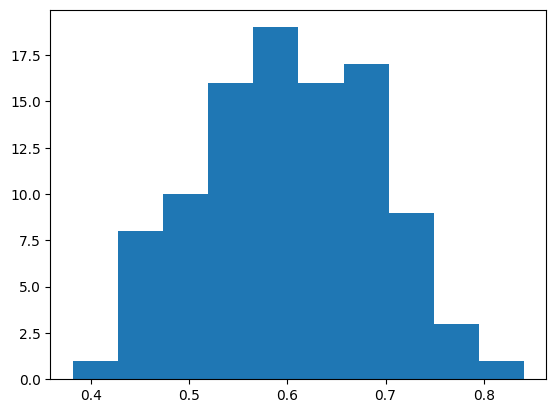

In [194]:
plt.hist(missing_test_accuracy)

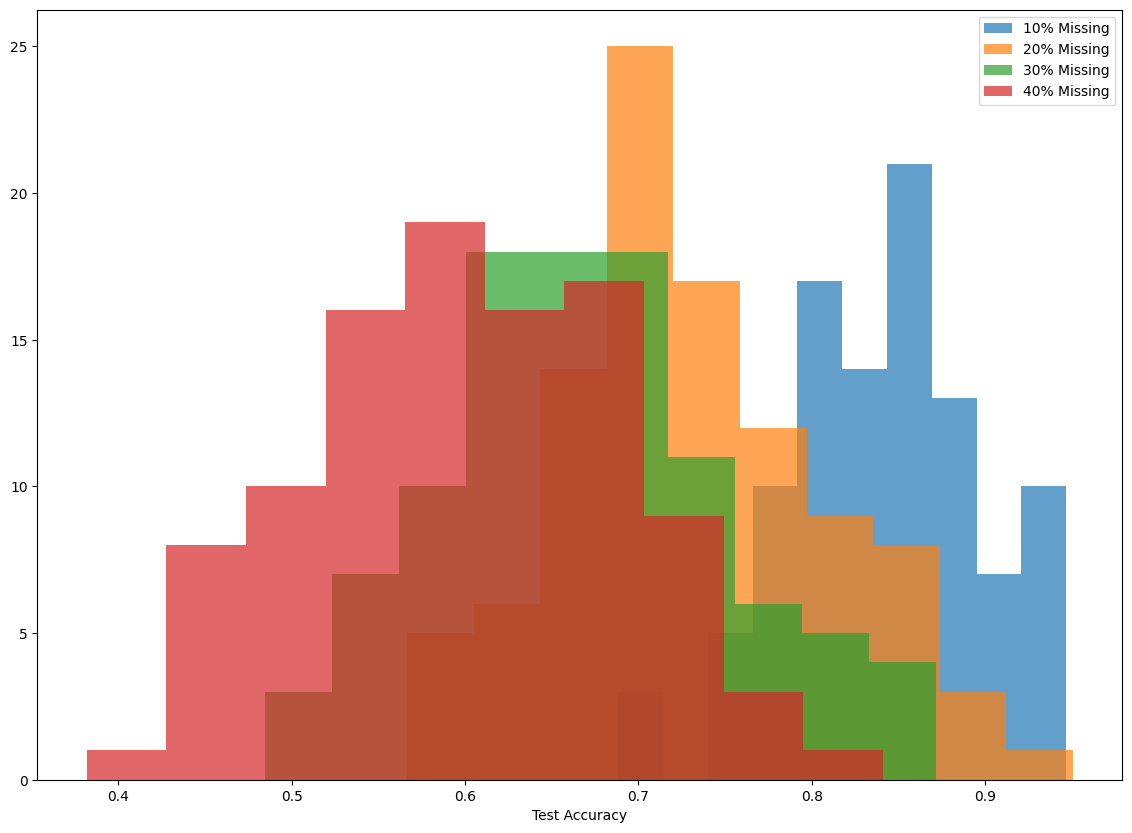

In [237]:
plt.figure(figsize=(14, 10))
plt.hist(missing_test_accuracy_point[10], alpha=0.7, label='10% Missing')
plt.hist(missing_test_accuracy_point[20], alpha=0.7, label='20% Missing')
plt.hist(missing_test_accuracy_point[30], alpha=0.7, label='30% Missing')
plt.hist(missing_test_accuracy_point[40], alpha=0.7, label='40% Missing')
plt.xlabel('Test Accuracy')
plt.legend()

In [195]:
np.max(missing_test_accuracy)

0.8409

In [ ]:
missing_idxs[np.argmax(missing_test_accuracy)]

['6_0',
 '5_0',
 '2_7',
 '5_3',
 '5_8',
 '0_9',
 '8_2',
 '9_0',
 '4_3',
 '5_1',
 '6_8',
 '0_6',
 '3_5',
 '2_8',
 '3_4',
 '8_5',
 '7_2',
 '4_5',
 '9_6',
 '0_5',
 '7_5',
 '1_5',
 '5_4',
 '6_9',
 '8_6',
 '5_7']

In [197]:
missing_idxs[np.argmin(missing_test_accuracy)]

['6_0',
 '5_0',
 '5_3',
 '4_0',
 '2_6',
 '7_3',
 '4_1',
 '7_1',
 '1_7',
 '0_6',
 '3_5',
 '4_2',
 '0_2',
 '0_4',
 '6_2',
 '1_6',
 '4_6',
 '2_0',
 '6_1',
 '9_6',
 '1_4',
 '0_5',
 '2_4',
 '6_9',
 '3_7',
 '3_9',
 '9_3',
 '6_4']

In [215]:
classifier_ij = list(pairwise_train_data.keys())
# best_acc = np.mean(pi_test_data.to_numpy().argmax(1) == test_y.numpy())
missing_train_accuracies = list()
missing_test_accuracies = list()
RMV = 10
removed_classifiers = list()

In [216]:
while RMV > 0:

    miss_scores = dict()

    for miss_idx in tqdm(classifier_ij):
        missing_idx = [miss_idx] + removed_classifiers
        missing_idx = list(set([f'{i}_{j}' for i, j in missing_idx] + [f'{j}_{i}' for i, j in missing_idx]))

        pi_missing_train_data = list()

        for idx in range(rij_train_data.shape[0]):  
            rij_obsv = copy.deepcopy(rij_train_data.iloc[idx])
            # pi = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
            # plt.plot(pi)
            # missing_idx = [np.random.choice(10, 2, replace=False) for _ in range(NUM_MISSING)]
            # missing_idx = list(set([f'{i}_{j}' for i, j in missing_idx] + [f'{j}_{i}' for i, j in missing_idx]))
            rij_obsv[missing_idx] = 0
            pi_missing = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
            pi_missing_train_data.append(pi_missing)
            # plt.plot(pi_missing)
            # plt.show()
            # print((missing_idx))
            # print(pi.argmax(), pi_missing.argmax(), test_y[idx].item())

        pi_missing_train_data = pd.DataFrame(np.array(pi_missing_train_data), columns=list(range(10)))
        miss_scores[miss_idx] = np.mean(pi_missing_train_data.to_numpy().argmax(1) == train_y.numpy())
    
    lowest_impact_classifier = max(miss_scores, key=miss_scores.get)
    classifier_ij.remove(lowest_impact_classifier)
    removed_classifiers.append(lowest_impact_classifier)
    missing_train_accuracies.append(miss_scores[lowest_impact_classifier])

    missing_idx = list(set([f'{i}_{j}' for i, j in removed_classifiers] + [f'{j}_{i}' for i, j in removed_classifiers]))

    pi_missing_test_data = list()

    for idx in range(rij_test_data.shape[0]):  
        rij_obsv = copy.deepcopy(rij_test_data.iloc[idx])
        # pi = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
        # plt.plot(pi)
        # missing_idx = [np.random.choice(10, 2, replace=False) for _ in range(NUM_MISSING)]
        # missing_idx = list(set([f'{i}_{j}' for i, j in missing_idx] + [f'{j}_{i}' for i, j in missing_idx]))
        rij_obsv[missing_idx] = 0
        pi_missing = np.array([np.array([rij_obsv[f'{i}_{j}'] for j in range(10) if j != i]).sum()/45 for i in range(10)])
        pi_missing_test_data.append(pi_missing)
        # plt.plot(pi_missing)
        # plt.show()
        # print((missing_idx))
        # print(pi.argmax(), pi_missing.argmax(), test_y[idx].item())

    pi_missing_test_data = pd.DataFrame(np.array(pi_missing_test_data), columns=list(range(10)))
    missing_test_accuracies.append(np.mean(pi_missing_test_data.to_numpy().argmax(1) == test_y.numpy()))

    print(f'Train Accuracy: {missing_train_accuracies[-1]}')
    print(f'Test Accuracy: {missing_test_accuracies[-1]}')
    print(f'Removed: {lowest_impact_classifier}')
    print(f'Removed Till now: {removed_classifiers}')
    RMV -= 1

100%|██████████| 45/45 [12:00<00:00, 16.02s/it]


Train Accuracy: 0.9822
Test Accuracy: 0.9565
Removed: (1, 6)
Removed Till now: [(1, 6)]


100%|██████████| 44/44 [11:43<00:00, 15.98s/it]


Train Accuracy: 0.9737333333333333
Test Accuracy: 0.9467
Removed: (0, 5)
Removed Till now: [(1, 6), (0, 5)]


100%|██████████| 43/43 [11:32<00:00, 16.10s/it]


Train Accuracy: 0.9749333333333333
Test Accuracy: 0.9468
Removed: (3, 8)
Removed Till now: [(1, 6), (0, 5), (3, 8)]


100%|██████████| 42/42 [11:15<00:00, 16.07s/it]


Train Accuracy: 0.9677333333333333
Test Accuracy: 0.9416
Removed: (2, 9)
Removed Till now: [(1, 6), (0, 5), (3, 8), (2, 9)]


100%|██████████| 41/41 [11:00<00:00, 16.10s/it]


Train Accuracy: 0.9838166666666667
Test Accuracy: 0.9564
Removed: (4, 7)
Removed Till now: [(1, 6), (0, 5), (3, 8), (2, 9), (4, 7)]


100%|██████████| 40/40 [10:47<00:00, 16.19s/it]


Train Accuracy: 0.9636166666666667
Test Accuracy: 0.9373
Removed: (1, 2)
Removed Till now: [(1, 6), (0, 5), (3, 8), (2, 9), (4, 7), (1, 2)]


100%|██████████| 39/39 [10:25<00:00, 16.04s/it]


Train Accuracy: 0.9451
Test Accuracy: 0.9198
Removed: (5, 6)
Removed Till now: [(1, 6), (0, 5), (3, 8), (2, 9), (4, 7), (1, 2), (5, 6)]


100%|██████████| 38/38 [10:14<00:00, 16.16s/it]


Train Accuracy: 0.9289166666666666
Test Accuracy: 0.9017
Removed: (0, 7)
Removed Till now: [(1, 6), (0, 5), (3, 8), (2, 9), (4, 7), (1, 2), (5, 6), (0, 7)]


100%|██████████| 37/37 [09:58<00:00, 16.16s/it]


Train Accuracy: 0.9291166666666667
Test Accuracy: 0.9038
Removed: (4, 9)
Removed Till now: [(1, 6), (0, 5), (3, 8), (2, 9), (4, 7), (1, 2), (5, 6), (0, 7), (4, 9)]


100%|██████████| 36/36 [09:46<00:00, 16.29s/it]


Train Accuracy: 0.8743666666666666
Test Accuracy: 0.8533
Removed: (6, 8)
Removed Till now: [(1, 6), (0, 5), (3, 8), (2, 9), (4, 7), (1, 2), (5, 6), (0, 7), (4, 9), (6, 8)]


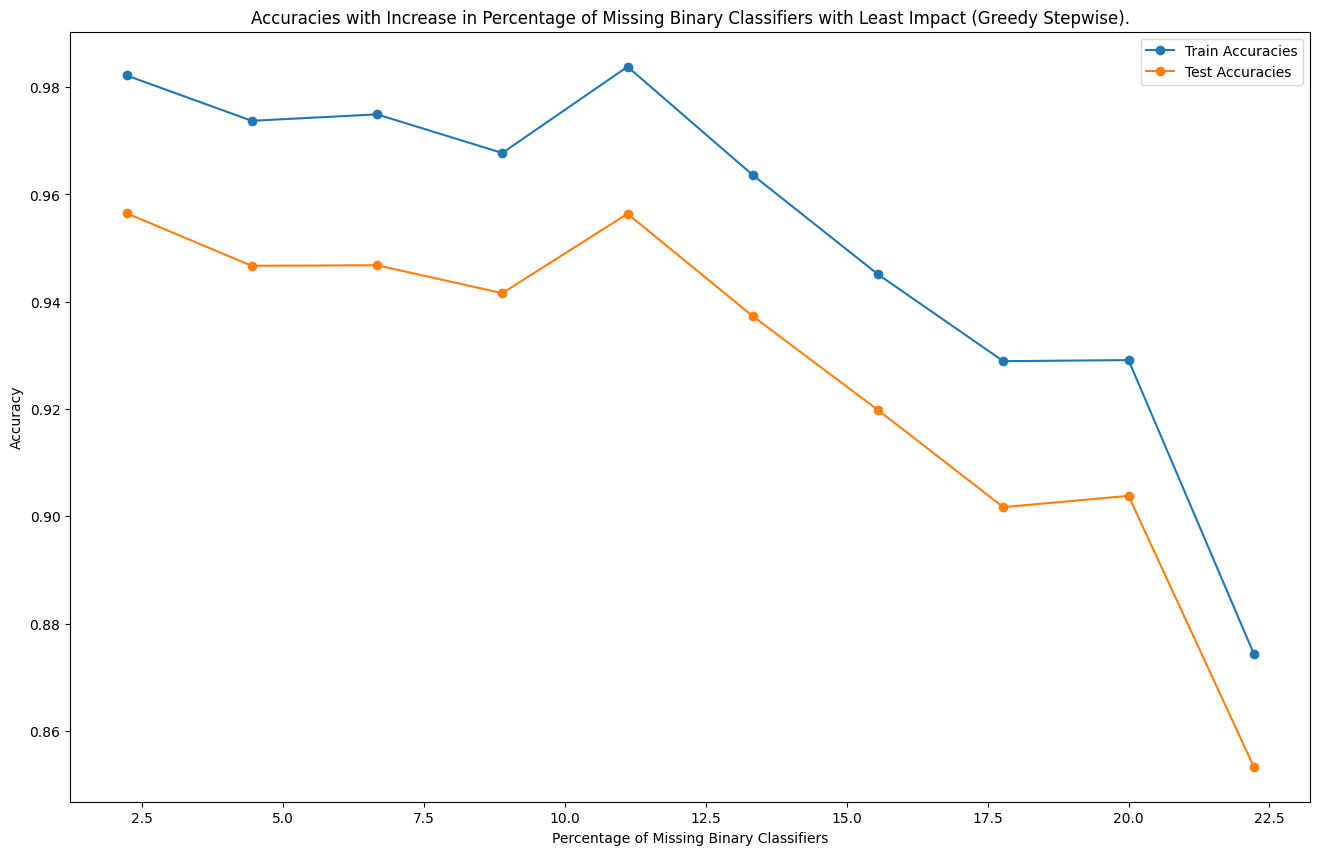

In [222]:
plt.figure(figsize=(16, 10))
plt.plot([(i+1)/45 * 100 for i in range(10)], missing_train_accuracies, '-o', label='Train Accuracies')
plt.plot([(i+1)/45 * 100 for i in range(10)], missing_test_accuracies, '-o', label='Test Accuracies')
plt.xlabel('Percentage of Missing Binary Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracies with Increase in Percentage of Missing Binary Classifiers with Least Impact (Greedy Stepwise).')
plt.legend()